# Task : Customer Churn Prediction for a Telecom Company

**Objective:** Build a machine learning model to predict customer churn using historical data.\
**Data**: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

**Deliverables:**

1. Exploratory Data Analysis (EDA)
2. Feature engineering
3. Train/test split and model selection (Logistic Regression, XGBoost, etc.)
4. Performance metrics (confusion matrix, AUC-ROC)
5. Final report with visualizations

# 1. Exploratory Data Analysis 

This section outlines the `Exploratory Data Analysis` performed on the `Telco Customer Churn dataset`. The primary aim is to gain initial insights into the data, identify potential `data quality issues`, and understand the `relationships between different customer attributes` and `churn`.



## 1.1 Setup and Data Loading

In [1]:
# Loading Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

# Set some display options for better output
pd.set_option('display.max_columns', None) # Show all columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Format floats to 2 decimal places

# loading data set
try:
    file_path = "data/Telco-Customer-Churn.csv"
    tcc_df = pd.read_csv(file_path)
except:
    print(f"Error: {file_path} was not found!")

In [2]:
# Displaying the first few rows
tcc_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# according to documentation there spaces instead of nan in TotalCharges Feature, 
# so replacing null spaces with nan, and changing its data type to float
tcc_df["TotalCharges"] = tcc_df["TotalCharges"].replace(" ", np.nan).astype(float)

**Observation:**
- Important data manipulation and data visualization libraries are loaded
- Replaced spaces with nan and changed data type of `TotalCharges` to numeric according to data documentation
- First data records are shown

## 1.2 Basic Data Inspection

In [4]:
# making a function which shows both info and describe data statistics
def df_summary(df):
    summary = pd.DataFrame({
        "Data Type" : df.dtypes,
        "Null Values" : df.isna().sum(),
        "Unique Values" : df.nunique(),
        "Examples": df.iloc[0],
        "mean": df.mean(numeric_only=True),
        "std" : df.std(numeric_only=True),
        "min" : df.min(numeric_only=True),
        "25%" : df.quantile(q=0.25, numeric_only=True),
        "50%" : df.quantile(q=0.5, numeric_only=True),
        "75%" : df.quantile(q=0.75, numeric_only=True, ),
        "max" : df.max(numeric_only=True)
    }).sort_values(by=["Data Type", "Unique Values"]).fillna("Not Available")
    return summary
summary = df_summary(tcc_df)
summary

,Data Type,Null Values,Unique Values,Examples,mean,std,min,25%,50%,75%,max
SeniorCitizen,int64,0,2,0,0.16,0.37,0.00,0.00,0.00,0.00,1.00
tenure,int64,0,73,1,32.37,24.56,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,float64,0,1585,29.85,64.76,30.09,18.25,35.50,70.35,89.85,118.75
TotalCharges,float64,11,6530,29.85,2283.30,2266.77,18.80,401.45,1397.47,3794.74,8684.80
Churn,object,0,2,No,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Dependents,object,0,2,No,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
PaperlessBilling,object,0,2,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Partner,object,0,2,Yes,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
PhoneService,object,0,2,No,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
gender,object,0,2,Female,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [5]:
print(f"Number of Rows: {tcc_df.shape[0]}")
print(f"Number of Columns: {tcc_df.shape[1]}")

Number of Rows: 7043
Number of Columns: 21


**Observation:**
- Total Rows: 7043
- Total Columns: 21 (2 → int64, 2 → float, 	17 → object)
- There are `7 Binary Categorical columns` and `10 Multi-category columns`

- Data Quality
    - Total Charges has 11 missing values
    - CustomerID is unique all unique values, so it will be droped soon.

- `tenure` ranges from  `0 to 72`, with mean of 32.37 and median of 29.00.
    - mean is greater than median, which suggests data is `positively skewed`

- `MonthlyCharges` ranges from `18.25 to 118.75`, with mean of 64.76 and median of 70.35.
    - mean is less than median, which suggests data is `negatively skewed`

- `TotalCharges` ranges from `18.80	 to 8684.80`, with mean of 2283.30 and median of 1397.47.
    - mean is greater than median, which suggests data is `positively skewed`

## 1.3: Data Cleaning

Here, we will address issues like missing values, and incorrect data type.\
We already corrected data type of `TotalCharges` in `1.1 Setup and Data Loading` section.

### 1.3.1 Filling missing values

In [6]:
tenure_mask = (tcc_df["tenure"] == 0) & (tcc_df["TotalCharges"].isna())
# if tenure is zero so fill it with 0
tcc_df.loc[tenure_mask, "TotalCharges"] = 0
# otherwise fill it with median values
tcc_df.loc[~tenure_mask, "TotalCharges"].fillna(tcc_df.loc[~tenure_mask, "TotalCharges"].median(), inplace=True)

### 1.3.2 Inspecting Categorical Features

Here we will see if there are any wrong values, two different values that could be represented by one value, or Spelling Errors.

In [7]:
categorical_features = summary[(summary['Data Type'] == "object") & (summary["Unique Values"] <= 4 )].index.tolist()
# categorical_features
for feature in categorical_features:
    print(f"'{feature}' unique values: {tcc_df[feature].unique()}")

'Churn' unique values: ['No' 'Yes']
'Dependents' unique values: ['No' 'Yes']
'PaperlessBilling' unique values: ['Yes' 'No']
'Partner' unique values: ['Yes' 'No']
'PhoneService' unique values: ['No' 'Yes']
'gender' unique values: ['Female' 'Male']
'Contract' unique values: ['Month-to-month' 'One year' 'Two year']
'DeviceProtection' unique values: ['No' 'Yes' 'No internet service']
'InternetService' unique values: ['DSL' 'Fiber optic' 'No']
'MultipleLines' unique values: ['No phone service' 'No' 'Yes']
'OnlineBackup' unique values: ['Yes' 'No' 'No internet service']
'OnlineSecurity' unique values: ['No' 'Yes' 'No internet service']
'StreamingMovies' unique values: ['No' 'Yes' 'No internet service']
'StreamingTV' unique values: ['No' 'Yes' 'No internet service']
'TechSupport' unique values: ['No' 'Yes' 'No internet service']
'PaymentMethod' unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


**Observation**
- DeviceProtection, OnlineBackup, OnlineSecurity, StreamingMovies, StreamingTV, and TechSupport all has 'No internet service', which can be represented by No.
- MultipleLines has 'No phone service', which can be represented by No, which is done in next cell.

In [8]:
standardization_features =  ["DeviceProtection", "OnlineBackup", "OnlineSecurity", "StreamingMovies", "StreamingTV", "TechSupport"]
for feature in standardization_features:
    tcc_df[feature] = tcc_df[feature].replace("No internet service", "No")

tcc_df["MultipleLines"] = tcc_df[feature].replace("No phone service", "No")

In [9]:
# confirming results
for feature in categorical_features:
    print(f"'{feature}' unique values: {tcc_df[feature].unique()}")

'Churn' unique values: ['No' 'Yes']
'Dependents' unique values: ['No' 'Yes']
'PaperlessBilling' unique values: ['Yes' 'No']
'Partner' unique values: ['Yes' 'No']
'PhoneService' unique values: ['No' 'Yes']
'gender' unique values: ['Female' 'Male']
'Contract' unique values: ['Month-to-month' 'One year' 'Two year']
'DeviceProtection' unique values: ['No' 'Yes']
'InternetService' unique values: ['DSL' 'Fiber optic' 'No']
'MultipleLines' unique values: ['No' 'Yes']
'OnlineBackup' unique values: ['Yes' 'No']
'OnlineSecurity' unique values: ['No' 'Yes']
'StreamingMovies' unique values: ['No' 'Yes']
'StreamingTV' unique values: ['No' 'Yes']
'TechSupport' unique values: ['No' 'Yes']
'PaymentMethod' unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


### 1.3.3 Removing customerID

because it uniquely identifies each record and would not help in data modeling and data analysis.

In [10]:
tcc_df.drop(columns=["customerID"], inplace=True)

### 1.3.4 Removing Duplicates if any

In [11]:
# checking first if duplicate exist then remove it.
if tcc_df.duplicated().any():
    print(f"Total {tcc_df.duplicated().sum()} records were removed.")
    tcc_df.drop_duplicates(inplace=True)

Total 22 records were removed.


## 1.4 Univariate Analysis(Analyzing Individual Features)

Here will will examine distribution of individual features.

### 1.4.1 Target Variable (`Churn`)

In [12]:
churn_counts = tcc_df["Churn"].value_counts(normalize=True) * 100

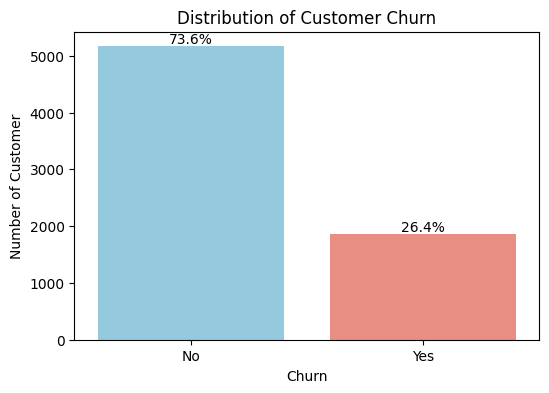

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=tcc_df, x="Churn", hue="Churn", palette=["skyblue", "salmon"])
plt.title("Distribution of Customer Churn")
plt.xlabel("Churn")
plt.ylabel("Number of Customer")

for i, percentage in enumerate(churn_counts):
    plt.text(i, tcc_df["Churn"].value_counts().iloc[i], f"{percentage:.1f}%", ha="center", va="bottom", fontsize=10)
plt.show()

**Observation:**
- Churn Rate is 26.4%, which means aproximately 26.4% of the customers left the service, while 73.6% have not.

### 1.4.2 Numerical Features

In [14]:
numeric_features = tcc_df.select_dtypes(include=np.number).columns.tolist()
numeric_features.remove("SeniorCitizen")
numeric_features

['tenure', 'MonthlyCharges', 'TotalCharges']

#### Histogram / Data Distribution

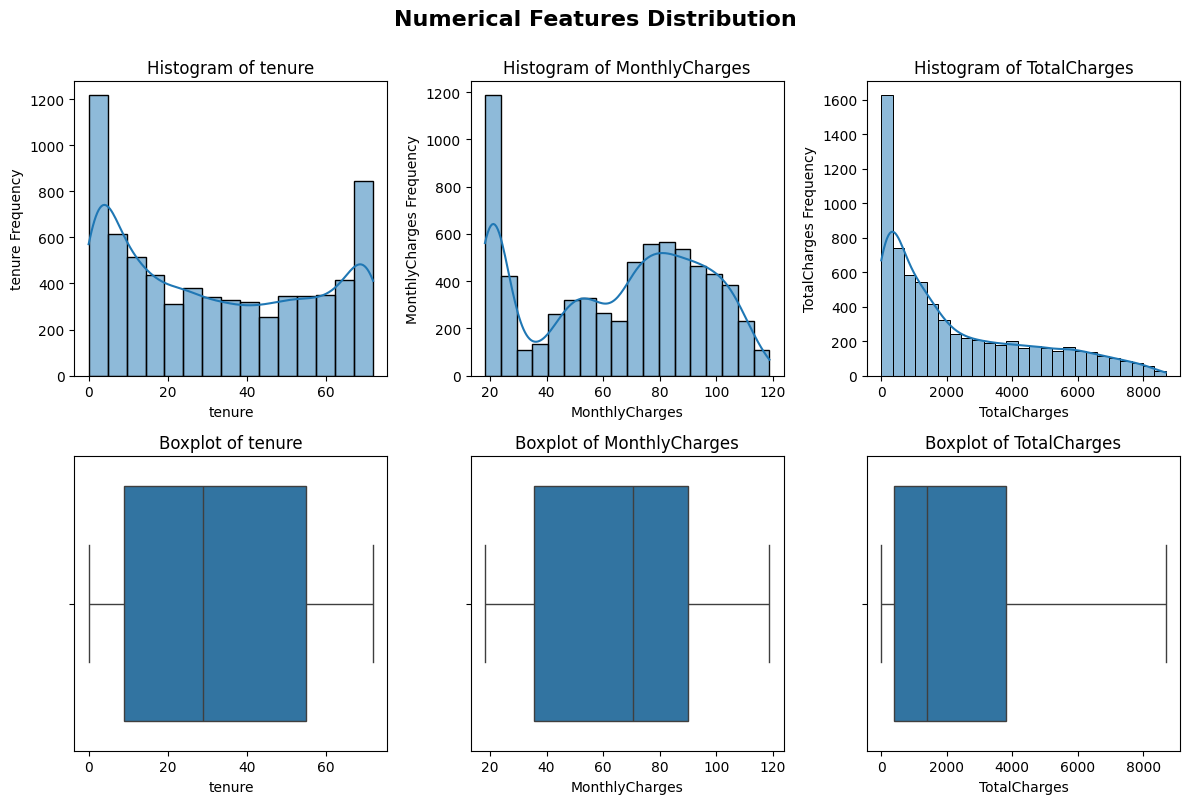

📊 Numerical Feature Summary:



,count,mean,std,min,25%,50%,75%,max,Skewness,Outliers
tenure,7021.00,32.47,24.53,0.00,9.00,29.00,55.00,72.00,0.24,0
MonthlyCharges,7021.00,64.85,30.07,18.25,35.75,70.40,89.90,118.75,-0.22,0
TotalCharges,7021.00,2286.77,2266.86,0.00,403.35,1400.55,3801.70,8684.80,0.96,0


In [15]:
fig, (axr, axc) = plt.subplots(nrows=2, ncols=len(numeric_features), figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    sns.histplot(data=tcc_df, x=feature, ax=axr[i], kde=True)
    axr[i].set_ylabel(f"{feature} Frequency")
    axr[i].set_title(f"Histogram of {feature}")

for i, feature in enumerate(numeric_features):
    sns.boxplot(data=tcc_df, x=feature, ax=axc[i])
    # axc[i].set_ylabel(f"{feature} Frequency")
    axc[i].set_title(f"Boxplot of {feature}")

plt.suptitle("Numerical Features Distribution", fontsize=16, y=1, fontweight="bold")
plt.tight_layout()
plt.show()

# Data summary
summary = tcc_df[numeric_features].describe().T
summary["Skewness"] = tcc_df[numeric_features].skew()

# data outliers
data = tcc_df[numeric_features]
q1 = tcc_df[numeric_features].quantile(0.25)
q3 = tcc_df[numeric_features].quantile(0.75)
iqr = q3 - q1
outliers = ((data < (q1 - 1.5 * iqr)) | (data > (q3 + 1.5 * iqr))).sum()
summary["Outliers"] = outliers

# Display summary stats
print("📊 Numerical Feature Summary:\n")
display(summary)


**Observations:**

- **Tenure**
    - **Distribution:** Bimodal with peaks at low and high values.
    - **Skewness:** Slightly right-skewed (Skewness: 0.24).
    - **Outliers:** None evident in the boxplot.
    - **Central Tendency:** Median is 29, indicating that half the customers have a tenure of less than 2.5 years.

- **MonthlyCharges**
    - **Distribution:** Fairly uniform with slight concentration at lower and higher values.
    - **Skewness:** Slightly left-skewed (Skewness: -0.22).
    - **Outliers:** None evident in the boxplot.
    - **Central Tendency:** Median is $70.40, indicating that most customers are charged around this amount monthly.

- **TotalCharges**
    - **Distribution:** Right-skewed, with a large number of customers having low total charges.
    - **Skewness:** Positively skewed (Skewness: 0.96).
    - **Outliers:** None evident in the boxplot.
    - **Central Tendency:** Median is 1400.55, indicating that half the customers have total charges below this value.

### 1.4.3 Categorical Features

Here we will see distribution of Categorical Features

In [16]:
# Considering features with less or equal to 4 unique values Categorical Features 
summary = df_summary(tcc_df)
mask = summary["Unique Values"] <= 4
categorical_features = summary[mask].index.tolist()

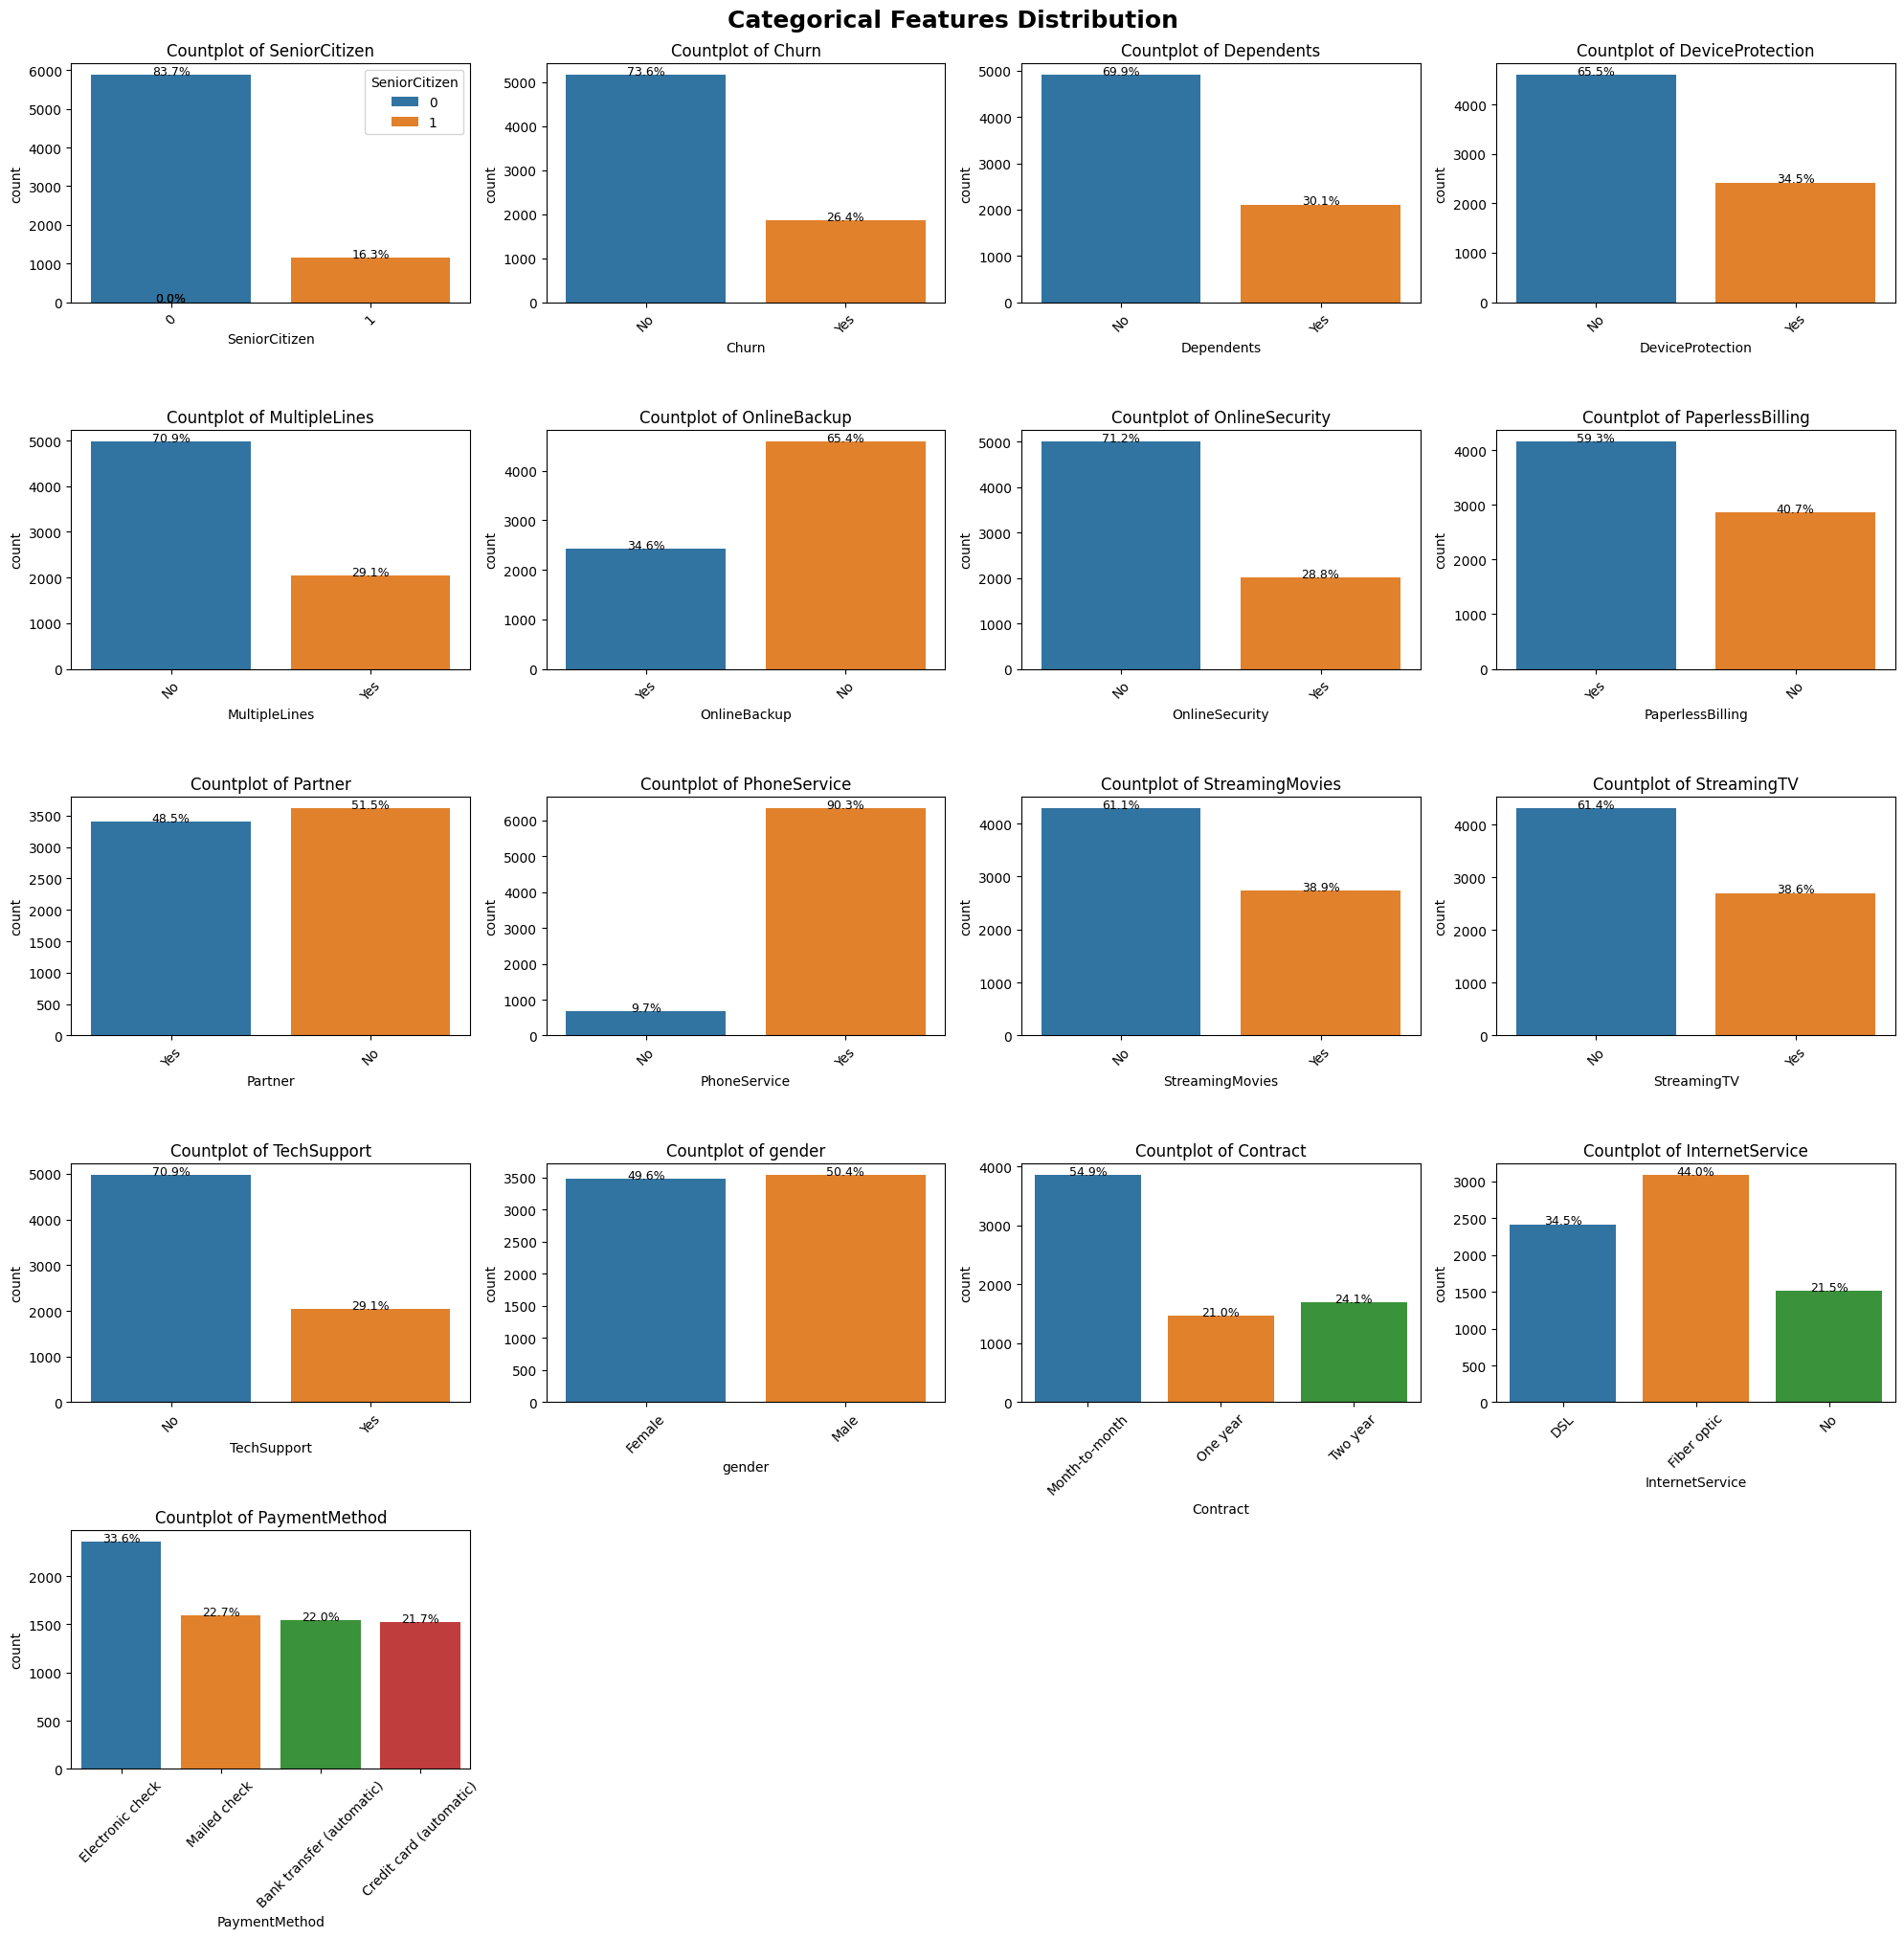

In [17]:
# Number of features
num_features = len(categorical_features)
cols = 4
rows = math.ceil(num_features / cols)

# Create subplot grid
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
ax = ax.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    # Count and percentage
    total = len(tcc_df)
    value_counts = tcc_df[feature].value_counts(normalize=True) * 100
    
    # Plot
    sns.countplot(data=tcc_df, x=feature, ax=ax[i], hue=feature)
    ax[i].set_title(f'Countplot of {feature}')
    ax[i].tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar
    for p in ax[i].patches:
        height = p.get_height()
        percent = (height / total) * 100
        ax[i].text(p.get_x() + p.get_width()/2., height + 2,
                   f'{percent:.1f}%', ha='center', fontsize=9)

# Hide unused subplots
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Categorical Features Distribution", y=1.01, fontweight="bold", fontsize=18)
plt.show()


In [18]:
# for feature in categorical_features:
#     value_counts = tcc_df[feature].value_counts(normalize=True)
#     print(f"{value_counts}\n")

 **Observations : Category Frequencies**

- **SeniorCitizen**: 0 → 83.7%, 1 → 16.3%
- **Churn**: No → 73.6%, Yes → 26.4%
- **Dependents**: No → 69.9%, Yes → 30.1%
- **DeviceProtection**: No → 65.5%, Yes → 34.5%
- **MultipleLines**: No → 70.9%, Yes → 29.1%
- **OnlineBackup**: No → 65.4%, Yes → 34.6%
- **OnlineSecurity**: No → 71.2%, Yes → 28.8%
- **PaperlessBilling**: Yes → 59.3%, No → 40.7%
- **Partner**: No → 51.5%, Yes → 48.5%
- **PhoneService**: Yes → 90.3%, No → 9.7%
- **StreamingMovies**: No → 61.1%, Yes → 38.9%
- **StreamingTV**: No → 61.4%, Yes → 38.6%
- **TechSupport**: No → 70.9%, Yes → 29.1%
- **gender**: Male → 50.4%, Female → 49.6%
- **Contract**: Month-to-month → 54.9%, Two year → 24.1%, One year → 21.0%
- **InternetService**: Fiber optic → 44.0%, DSL → 34.5%, No → 21.5%
- **PaymentMethod**: Electronic check → 33.6%, Mailed check → 22.7%, Bank transfer (automatic) → 22.0%, Credit card (automatic) → 21.7%

In [19]:
# summary = ""
# for col in categorical_features:
#     counts = tcc_df[col].value_counts(normalize=True).mul(100).round(1)
#     labels = [f"{idx} → {val:.1f}%" for idx, val in counts.items()]
#     summary += f"- **{col}**: " + ", ".join(labels) + "\n"

# print(summary)

## 1.5 Bivariate Analysis(Exploring Relationships, especially with `Churn`)

Here we will investigate how different fearures relate with `Churn`.

### 1.5.1 Categorical Features vs Churn

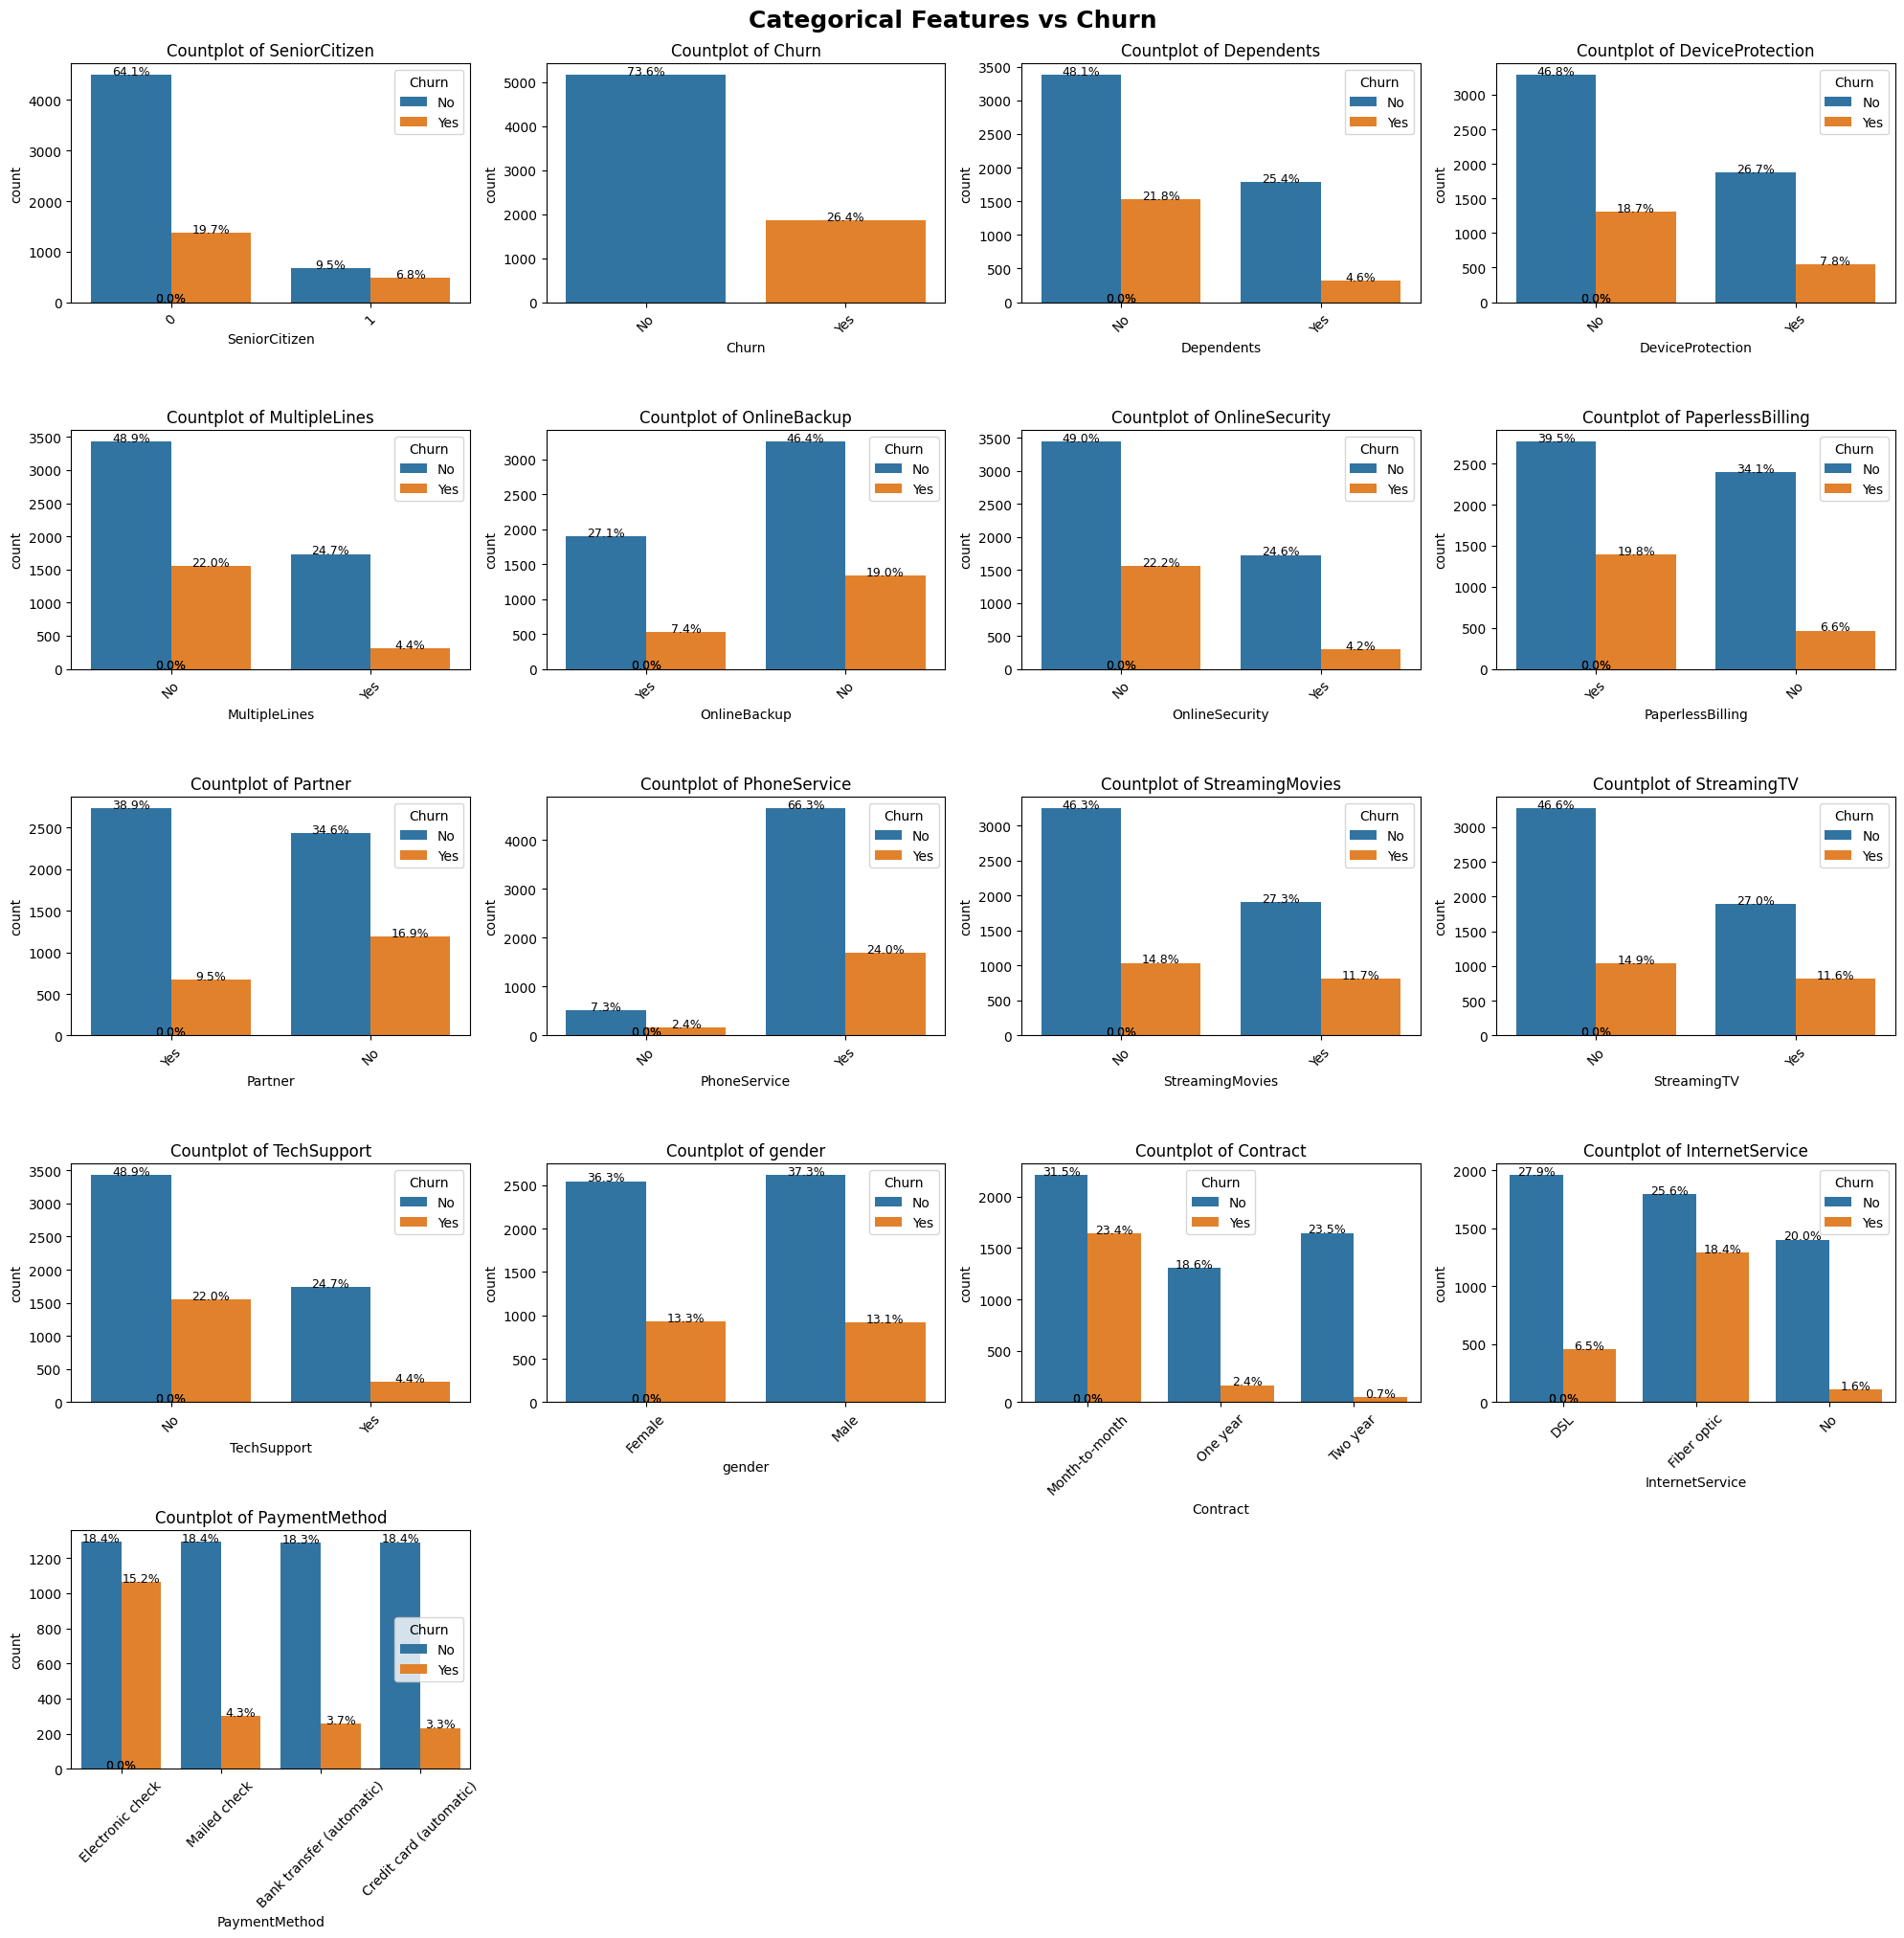

In [20]:
# Number of features
num_features = len(categorical_features)
cols = 4
rows = math.ceil(num_features / cols)

# Create subplot grid
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(5 * cols, 4 * rows))
ax = ax.flatten()

# Plot each feature
for i, feature in enumerate(categorical_features):
    # Count and percentage
    total = len(tcc_df)
    value_counts = tcc_df[feature].value_counts(normalize=True) * 100
    
    # Plot
    sns.countplot(data=tcc_df, x=feature, hue="Churn", ax=ax[i])
    ax[i].set_title(f'Countplot of {feature}')
    ax[i].tick_params(axis='x', rotation=45)
    
    # Add percentage labels on each bar
    for p in ax[i].patches:
        height = p.get_height()
        percent = (height / total) * 100
        ax[i].text(p.get_x() + p.get_width()/2., height + 2,
                   f'{percent:.1f}%', ha='center', fontsize=9)

# Hide unused subplots
for j in range(i + 1, len(ax)):
    ax[j].set_visible(False)

plt.tight_layout()
plt.suptitle("Categorical Features vs Churn", y=1.01, fontsize=18, fontweight="bold")
plt.show()


**Observation:**
- **SeniorCitizen**: Higher churn rate among senior citizens.
- **Dependents**: Customers without dependents churn more.
- **DeviceProtection**: Lack of protection linked to higher churn.
- **MultipleLines**: More churn among those with multiple lines or no phone service.
- **OnlineBackup**: Customers without backup churn more.
- **OnlineSecurity**: No security = higher churn.
- **PaperlessBilling**: Users with paperless billing churn more.
- **Partner**: Not having a partner correlates with higher churn.
- **PhoneService**: Slightly lower churn among those with service.
- **StreamingMovies/TV**: Slight increase in churn for users with these services.
- **TechSupport**: No tech support = significantly higher churn.
- **Gender**: No notable impact on churn.
- **Contract**: Month-to-month users churn most; 1- or 2-year contracts reduce churn.
- **InternetService**: Fiber optic users churn more; no internet = lowest churn.
- **PaymentMethod**: Electronic check users churn more than other methods.

### 1.5.2 Numerical Features vs Churn

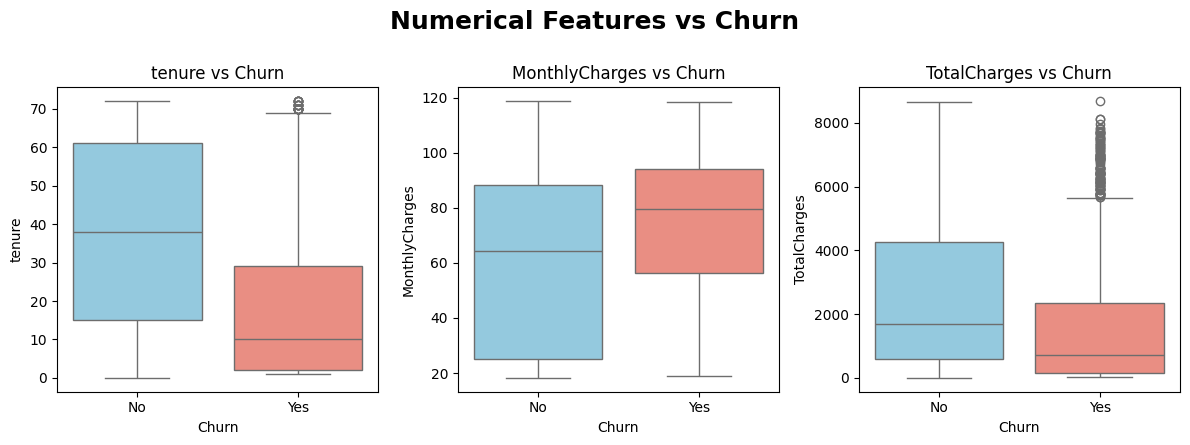

In [21]:
numeric_features = tcc_df.select_dtypes(include=np.number).drop(columns="SeniorCitizen", axis=1).columns.tolist()
fig, ax = plt.subplots(nrows=1, ncols=len(numeric_features), figsize=(12, 4))
for i,feature in enumerate(numeric_features):
    sns.boxplot(data=tcc_df, x="Churn", y=feature, ax=ax[i], hue="Churn", palette=["skyblue", "salmon"])
    ax[i].set_title(f"{feature} vs Churn")
    ax[i].set_ylabel(feature)
    ax[i].set_xlabel("Churn")
    
plt.tight_layout()
plt.suptitle("Numerical Features vs Churn", y=1.1, fontweight="bold", fontsize=18)
plt.show()

**Observation: Churn Analysis by Numerical Features**:

- **Tenure**: Churned customers have **significantly lower tenure**, indicating they leave earlier in their customer lifecycle.
- **MonthlyCharges**: Churned customers tend to have **higher monthly charges**, suggesting pricing may impact retention.
- **TotalCharges**: Churned customers show **lower total charges**, likely due to shorter tenure and earlier exits.


### 1.5.3 Correlation Analysis (Numeric Features)

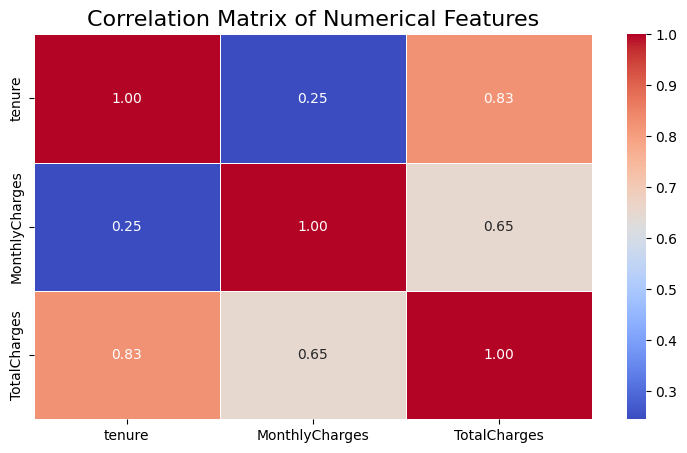

In [22]:
numeric_features = tcc_df.select_dtypes(include=np.number).drop(columns='SeniorCitizen', axis=1).columns.tolist()
correlation_matrix = tcc_df[numeric_features].corr()
plt.figure(figsize=(9, 5))
sns.heatmap(data=correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

**Observation:**
- `TotalCharges` has strong positve correlation with `tenure` of **0.83**. Longer tenure leads to high Total Charges, it may indicate **multicolinearity**.
- `TotalCharges` has moderate correlation with `MonthlyCharges` of **0.65**. It indicate higher monthly charges leads to higher total charges.
- `MonthlyCharges` has low correlation with `tenure` of **0.25**. None depends on the other. 

## 1.6. Key EDA Observations & Hypotheses Summary

#### **Data Quality**
- The dataset is generally clean and well-structured.
- The `TotalCharges` column contained blank strings that were replaced with `NaN` and converted to `float`. This issue was tied to new customers with very low tenure.
- Only 11 missing values were found in `TotalCharges` and were handled appropriately.
- No other significant missing data issues were detected.
- `customerID` is unique and can be safely excluded from modeling.

#### **Target Variable (Churn)**
- The churn rate is approximately **26.5%**, indicating a **class imbalance** that needs to be addressed during model training and evaluation.

#### **Key Predictors of Churn (Initial Thoughts)**
- **Contract Type**: Customers with **Month-to-month contracts** have a significantly higher churn rate than those on One year or Two year contracts.
- **Tenure**: Customers with lower tenure are more likely to churn, suggesting new customers are at higher risk.
- **Monthly Charges**: Higher monthly charges appear to be associated with higher churn.
- **Total Charges**: Lower total charges (indicative of newer customers) also show higher churn, maybe due to they left early.
- **Services like Online Security and Tech Support**: Lack of these services correlates with higher churn.
- **Payment Method**: Customers using **Electronic Check** show higher churn compared to other payment methods.

#### **Feature Relationships**
- `tenure` and `TotalCharges` are **highly positively correlated**, which is expected since longer tenure usually means more total charges.
- `MonthlyCharges` and `TotalCharges` also show a moderate correlation, while `MonthlyCharges` has little correlation with `tenure`.

#### **Other Notable Patterns**
- Senior Citizens tend to churn more frequently than younger customers.
- Customers who do not have **Partner** or **Dependents** churn at a higher rate.
- Those without **Paperless Billing** or with **Bank Transfer/Credit Card payments** show lower churn.

<!-- #### **Initial Hypotheses for Churn Drivers**
1. Customers on **month-to-month** contracts are more likely to churn due to lack of long-term commitment.
2. **New customers** (low tenure) might be more uncertain about the service and leave earlier.
3. **Higher billing** and **fewer value-added services** (like Online Security, Tech Support) could drive churn.
4. Customers paying via **Electronic Check** might be more cost-sensitive or less digitally engaged. -->

<!-- These findings provide a strong foundation for further **feature engineering** and **predictive modeling**, with attention to potential multicollinearity and class imbalance in the data. -->


# 1.2 Feature Engineering

**Objective**:
- Encoding categorical featuring into numeric features
- To transform existing features
- Create new features
- Creating new features

**Goal:** Prepare dataset for data modeling

## 2.1 Encoding Categorical Features

### 2.1.1 Encoding Binary Categorical Features and Target Feature

In [23]:
# Identifying features with binary values
summary = df_summary(df=tcc_df)
cat_binary_features = summary["Unique Values"][(summary["Unique Values"] == 2) & (summary["Data Type"] == "object")].index.tolist()
print(cat_binary_features)

['Churn', 'Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'Partner', 'PhoneService', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender']


In [24]:
# displaying data
tcc_df[cat_binary_features].head()

,Churn,Dependents,DeviceProtection,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PhoneService,StreamingMovies,StreamingTV,TechSupport,gender
0,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,Female
1,No,No,Yes,No,No,Yes,No,No,Yes,No,No,No,Male
2,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,No,No,Male
3,No,No,Yes,Yes,No,Yes,No,No,No,No,No,Yes,Male
4,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,Female


In [25]:
# from above we can see that only gender has different values
# so lets stadardize data accordingly
for col in cat_binary_features:
    if set(tcc_df[col]) == {"No", "Yes"}: # checking if features has Yes or No values
        tcc_df[col] = tcc_df[col].map({"No":0, "Yes":1})
    elif set(tcc_df[col]) == {"Female", "Male"}: # checking if features has Female or Male values
        tcc_df[col] = tcc_df[col].map({"Female": 0, "Male": 1})

In [26]:
# Confirming if all features has 0 and 1 values
tcc_df[cat_binary_features].head()

,Churn,Dependents,DeviceProtection,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PhoneService,StreamingMovies,StreamingTV,TechSupport,gender
0,0,0,0,0,1,0,1,1,0,0,0,0,0
1,0,0,1,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,1,1,0,1,0,0,0,1
3,0,0,1,1,0,1,0,0,0,0,0,1,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0


**Observation:**
- Successfully standardized Binary Categorical Features

### 2.1.2 Encoding Multi-Category Features

In [27]:
# Identifying features with binary values
summary = df_summary(tcc_df)
mul_cat_features = summary[summary["Data Type"] == "object"].index.tolist()
print(mul_cat_features)

['Contract', 'InternetService', 'PaymentMethod']


In [28]:
# Displaying data
tcc_df[mul_cat_features].head()

,Contract,InternetService,PaymentMethod
0,Month-to-month,DSL,Electronic check
1,One year,DSL,Mailed check
2,Month-to-month,DSL,Mailed check
3,One year,DSL,Bank transfer (automatic)
4,Month-to-month,Fiber optic,Electronic check


**Observation:** We can not see any inherent order in `Contract`, `InternetService`, and`PaymentMethod`, so we are going to use **One-Hot-Encoding**, and set `drop_first = True`, to avoid mis-scaling values.

In [29]:
# droping first column to reducing multi-colinearity
tcf_df_encoded = pd.get_dummies(data=tcc_df, columns=mul_cat_features, drop_first=True, dtype=int)

# displaying results
tcf_df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1
3,1,0,0,0,45,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,0,1,0


## 2.2 Creating New Features

Here we are going to create new features, based on the results from the EDA.

### 2.2.1 Tenure Groups

Bining `tenure` to capture non-linear patterns.

In [30]:
df_fe = tcf_df_encoded.copy() # working on copy

# setting bins and labels
bins = [0, 12, 24, 36, 48, 60, 73 ]
labels = ['0-1Y', '1-2Y', '2-3Y', '3-4Y', '4-5Y', '5Y+']

# creating tenure group feature
df_fe["TenureGroup"] = pd.cut(x = df_fe["tenure"], bins=bins, labels=labels, right=False, include_lowest=True)

# Applying OneHotEncoding on TenureGroup
df_fe = pd.get_dummies(data=df_fe, columns=["TenureGroup"], drop_first=True, dtype=int)

Creating a feature that shows `number of addition services`

In [31]:
additional_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df_fe["NumAdditionalServices"] = df_fe[additional_service_cols].sum(axis=1)

In [32]:
# removing white spaces from the features names
df_fe.columns = df_fe.columns.str.replace(" ","_")

In [33]:
# Displaying results
df_fe.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_One_year,Contract_Two_year,InternetService_Fiber_optic,InternetService_No,PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check,TenureGroup_1-2Y,TenureGroup_2-3Y,TenureGroup_3-4Y,TenureGroup_4-5Y,TenureGroup_5Y+,NumAdditionalServices
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,0,0,1,0,1,0,0,0,2
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,0,0,0,0,0,1,0,0,0,0,0,2
3,1,0,0,0,45,0,1,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,0,0,0,0,0,1,0,0,3
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,0,0,1,0,0,0,0,0,0,0


**Observations:**
- `tenure` was binned to get non-linear patterns in data.
- `NumAdditionanlServices` was created to represent customer engagement level with services. It shows howmany howmany addtional services a customer has. 

In [34]:
tcf_df_encoded = df_fe.copy()

# 3. Train/test Split and Model selection

**Objective:**
- Splitting processed data into Training and Testing data
- Scaling numeric feaures
- Train and make initial prediction

## 3.1 Seperating Features (X) and Target Label (y)

In [35]:
# Features
X = tcf_df_encoded.drop(columns=["Churn"])

# Target label
y = tcf_df_encoded["Churn"]

print(f"Features Shape: {X.shape}")
print(f"Target Label Shape: {y.shape}")
print("Distribution of Target Label")
print(f"{y.value_counts(normalize=True) * 100}")

Features Shape: (7021, 29)
Target Label Shape: (7021,)
Distribution of Target Label
Churn
0   73.55
1   26.45
Name: proportion, dtype: float64


**Observations:**
- X has 7021 records and 29 features
- y is imbalanced with churn rate of ~26.45%

## 3.2 Splitting Data into Training and Testing Sets

As data is imbalanced, so we will use `Stratification`, which will divide data at the same ratio.

In [36]:
from sklearn.model_selection import train_test_split

# test_size=0.2 is 20% data test set size and remain 80% is training data.
# using random_state to ensure the same data splitting every time.
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

# displaying train and test data set shares
print("Data After Splitting")
print(f"X_train: {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test : {y_test.shape}")

print("\n"+ "*" * 100)

# Displaying target variable distribution after splitting
print(f"\ny_train distribution: {y_train.value_counts(normalize=True) * 100}")
print(f"\ny_test distribution: {y_test.value_counts(normalize=True) * 100}")

Data After Splitting
X_train: (5265, 29)
X_test : (1756, 29)
y_train: (5265,)
y_test : (1756,)

****************************************************************************************************

y_train distribution: Churn
0   73.54
1   26.46
Name: proportion, dtype: float64

y_test distribution: Churn
0   73.58
1   26.42
Name: proportion, dtype: float64


**Observations:**
- We splitting the data with test size of 20% and training size of 80%
- Used random state to ensure same data splitting everytime.
- y_train and y_test has same data distribution ratio, which is done with the help of stratify=y

## 3.3 Feature Scaling

Here we will scale feature to ensure all features contribute equally to models learning process, leading to better performance and accuracy. 

In [37]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]

# creating copies to avoid changing original data set
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# initiating scaler
scaler = StandardScaler()

# fitting scaler
scaler.fit(X_train_scaled[cols_to_scale])

# transforming data in both training and testing datasets
X_train_scaled[cols_to_scale] = scaler.transform(X_train_scaled[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_scaled[cols_to_scale])

In [38]:
# sample training dataset
print("Training data")
print(X_train_scaled[cols_to_scale].head())
print(f"mean of  {X_train_scaled[cols_to_scale].mean()}\n")

# sample testing dataset
print("Testing data")
print(X_test_scaled[cols_to_scale].head())
print(f"mean of {X_test_scaled[cols_to_scale].mean()}")

Training data
      tenure  MonthlyCharges  TotalCharges
4036   -0.58           -1.48         -0.83
4462   -0.66            0.79         -0.38
2989   -1.28           -1.52         -0.99
4643   -1.19            0.02         -0.91
2875   -0.42            0.68         -0.18
mean of  tenure           -0.00
MonthlyCharges   -0.00
TotalCharges     -0.00
dtype: float64

Testing data
      tenure  MonthlyCharges  TotalCharges
4259   -1.19           -1.50         -0.98
2669   -0.54            1.01         -0.22
4153   -0.22           -1.48         -0.74
6584    0.72           -1.47         -0.53
6513   -0.70           -0.17         -0.62
mean of tenure           0.03
MonthlyCharges   0.01
TotalCharges     0.01
dtype: float64


**Observations:**
- Training dataset is Standardized with mean equal to 0(Zero)
- Testing dataset is Standardized  with  mean less than 1(One) 

## 3.4 Model Selection and Training

Here we will train several common and effective classfication models. 

### 3.4.1 LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression()
print("-"*25,"Training Logistic Regression", "-"*25)
log_reg_model.fit(X_train_scaled, y_train)
print("Logistic Regression model trained successfully.")

# Predicting Classes
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test_scaled)[:,1] #only storing probability of class or label 1

# Displaying results with probability
results = pd.DataFrame(zip(y_pred_log_reg, y_pred_proba_log_reg), columns=["Predicted Class", "Predicted Class Probability (Churn = 1)"])
results.head(10)

------------------------- Training Logistic Regression -------------------------
Logistic Regression model trained successfully.


,Predicted Class,Predicted Class Probability (Churn = 1)
0,0,0.23
1,0,0.47
2,0,0.02
3,0,0.01
4,0,0.19
5,0,0.10
6,1,0.76
7,0,0.21
8,1,0.82
9,1,0.76


**Observations:**
- LogisticRegression is a linear model usde for classification
- Trained the LogisticRegression model
- Showed only prediction probability of Churn=1

### 3.4.2 Random Forest Regression

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
# using class_weight='balanced' can be helpful for imbalanced dataset


print("-"*25, "Training Random Forest CLassifier", "-"*25)
rf_model.fit(X_train_scaled, y_train)
print("Random Forest Classifier Trained Successfully.")

# predicting Classes with
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# displaying results with probability
results = pd.DataFrame(zip(y_pred_rf, y_pred_proba_rf), columns=["Predicted Class", "Predicted Class Probability (Churn = 1)"])
results.head(10)

------------------------- Training Random Forest CLassifier -------------------------
Random Forest Classifier Trained Successfully.


,Predicted Class,Predicted Class Probability (Churn = 1)
0,0,0.26
1,1,0.72
2,0,0.02
3,0,0.00
4,0,0.29
5,0,0.24
6,1,0.80
7,0,0.38
8,1,0.89
9,1,0.89


**Observations:**
- RandomForestClassifier is an ensemble model
    - It is robut to overfitting with proper tuning.
    - As data is imbalanced, i used `class_weight='balanced'` for this issue
- Trained the RandomForestClassifier model
- Showed only prediction probability of Churn=1

### 3.4.3 Support Vector Classifier

In [41]:
from sklearn.svm import SVC

# Initialize the Support Vector Classifier
# C: Regularization parameter
# kernel: Specifies the kernel type to be used in the algorithm
# probability=True enables probability estimates (slower but needed for predict_proba)
# class_weight='balanced' can help with imbalanced classes

svc_model = SVC(C=1.0, kernel="rbf", probability=True, class_weight="balanced")
print("-"*25, "Training Support Vector Classifer (SVC) Model", "-"*25)
svc_model.fit(X_train_scaled, y_train)
print("Support Vector Classifier Trained Successfully.")

# predicting classes on test data
y_pred_svc = svc_model.predict(X_test_scaled)
y_pred_proba_svc = svc_model.predict_proba(X_test_scaled)[:, 1]

results = pd.DataFrame(zip(y_pred_svc, y_pred_proba_svc), columns=["Predicted Class", "Predicted Class Probability (Churn = 1)"])
results.head(10)

------------------------- Training Support Vector Classifer (SVC) Model -------------------------
Support Vector Classifier Trained Successfully.


,Predicted Class,Predicted Class Probability (Churn = 1)
0,0,0.11
1,1,0.52
2,0,0.03
3,0,0.06
4,0,0.20
5,0,0.07
6,1,0.62
7,0,0.22
8,1,0.61
9,1,0.65


**Observations:**
- Support Vector Classifier(SVC) is good for complex non-linear boundaries using different kernels
- Trained the SVC model
- Showed only prediction probability of Churn=1

### 3.4.4 XGBoost Classifier

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    n_estimators=100,
    max_depth=3, 
    eval_metric="logloss",
    random_state=42,
)
print("-"*25, "Training XGBoost CLasifier", "-"*25)
xgb_model.fit(X_train_scaled, y_train)
print("XGBoost Trained Successfully.")

# predicting classes on test data
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:,1]

# displaying results
results = pd.DataFrame(zip(y_pred_xgb, y_pred_proba_xgb), columns=["Predicted CLass", "Predicted Class Probability (Churn = 1)"])
results.head(10)

------------------------- Training XGBoost CLasifier -------------------------
XGBoost Trained Successfully.


,Predicted CLass,Predicted Class Probability (Churn = 1)
0,0,0.19
1,0,0.25
2,0,0.01
3,0,0.01
4,0,0.24
5,0,0.16
6,1,0.68
7,0,0.23
8,1,0.82
9,1,0.82


**Observations:**
- XGBoost is highly effective and efficient gradient boosting algorithm.
- Trained the XGBoost model
- Showed only prediction probability of Churn=1

### 3.4.5 LightGBM Classifier

In [43]:
import lightgbm as lgb

# Initialize the LightGBM Classifier
# class_weight='balanced' or is_unbalance=True can be useful for imbalanced datasets
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    class_weight="balanced", # handles imbalanced data classes,
    # force_row_wise=True,
    # force_col_wise=True
)
lgbm_model.fit(X_train_scaled, y_train)
print("-"*25, "Training LGBMClassifier", "-"*25)

# predicting classes
y_pred_lgbm = lgbm_model.predict(X_test_scaled)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test_scaled)[:,1]

# displaying results
results = pd.DataFrame(data=zip(y_pred_lgbm, y_pred_proba_lgbm), columns=["Predicted Class", "Predicted Class Probability (Churn = 1)"])
results.head(10)

[LightGBM] [Info] Number of positive: 1393, number of negative: 3872
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 641
[LightGBM] [Info] Number of data points in the train set: 5265, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
------------------------- Training LGBMClassifier -------------------------


,Predicted Class,Predicted Class Probability (Churn = 1)
0,0,0.22
1,1,0.68
2,0,0.01
3,0,0.00
4,0,0.46
5,0,0.12
6,1,0.85
7,0,0.48
8,1,0.89
9,1,0.90


**Observations:**
- LightGBM is high performance gradient boosting framework, known for its speed and efficiency
- Trained the LightGBM model
- Showed only prediction probability of Churn=1

### 3.4.6 Storing results for Evaluation:

In [44]:
# storing training scores
model_predictions = {
    "Logistic Regression" : (y_pred_log_reg, y_pred_proba_log_reg),
    "Random Forest" : (y_pred_rf, y_pred_proba_rf),
    "SVC" : (y_pred_svc, y_pred_proba_svc),
    "XGBoost" : (y_pred_xgb, y_pred_proba_xgb),
    "LightGBM" : (y_pred_lgbm, y_pred_proba_lgbm)
}

# storing trained models
trained_models = {
     "Logistic Regression" : log_reg_model,
    "Random Forest" : rf_model,
    "SVC" : svc_model,
    "XGBoost" : xgb_model,
    "LightGBM" : lgbm_model
}

# 4. Performance metrics (confusion matrix, AUC-ROC)

**Objective:**
- To evaluate and compare the performance of the trained churn prediction models using various classification metrics.

## 4.1 Import Necessary Libraries

In [45]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    classification_report
)


## 4.2 Evaluating Each Model

We will iterate through each model's predictiond and calculate metrics.

### 4.2.1 Confusion Matrix & Key Classification Metrics

A confusion matrix gives a detailed breakdown of correct and incorrect classification of each class.
- **True Positive:** Correctly predicted churn.
- **True Negative:** Correctly predicted no churn.
- **False Positive:** Incorrectly predicted churn.
- **True Negative:** Incorrectly predicted no churn (Type II error - often critical in churn prediction as you miss a customer who leaves).

In [46]:
# for model_name, (y_pred_class, y_pred_proba) in model_predictions.items():
#     # print(f"\nPerformance Metric for: {model_name}")
#     cm = confusion_matrix(y_test, y_pred_class)
#     # print(f"\nConfusion Matrix: \n{cm}")

#     # Extract TP, TN, FP, FN
#     TN, FP, FN, TP = cm.ravel()
#     labels = np.array([
#         [f"True Negative\n{TN}", f"False Positive\n{FP}"],
#         [f"False Negative\n{FN}", f"True Positive\n{TP}"]
#     ])

#     accuracy = accuracy_score(y_test, y_pred_class)
#     precision = precision_score(y_test, y_pred_class)
#     recall = recall_score(y_test, y_pred_class)
#     f1 = f1_score(y_test, y_pred_class)

#     print("-"*25,f"{model_name} Key Metrics","-"*25)
#     print(f"Accuracy : {accuracy * 100:.4f}%")
#     print(f"Precision : {precision * 100:.4f}%")
#     print(f"Recall : {recall * 100:.4f}%")
#     print(f"F1 Score : {f1 * 100:.4f}%")
    
#     plt.figure(figsize=(5,3))
#     sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
#     plt.xlabel("Predicted Label")
#     plt.ylabel("Actual Label")
#     plt.title(f"Confusion Matrix - {model_name}")
#     plt.show()

    

------------------------- Logistic Regression Key Metrics -------------------------
Accuracy : 80.6378%
Precision : 67.3184%
Recall : 51.9397%
F1 Score : 58.6375%
AUC-ROC : 0.8444


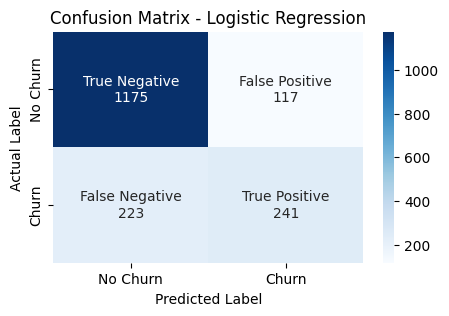

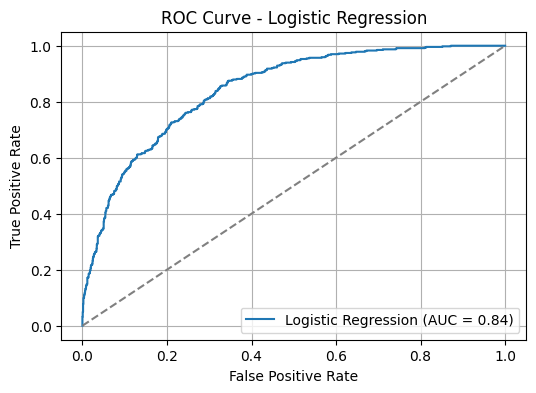

------------------------- Random Forest Key Metrics -------------------------
Accuracy : 77.5626%
Precision : 55.9932%
Recall : 70.4741%
F1 Score : 62.4046%
AUC-ROC : 0.8416


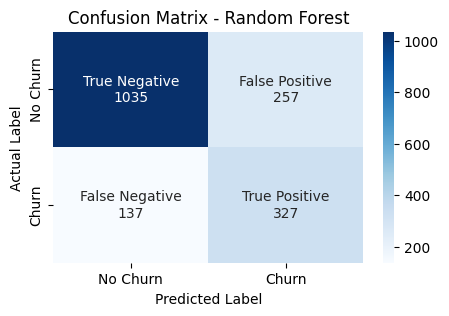

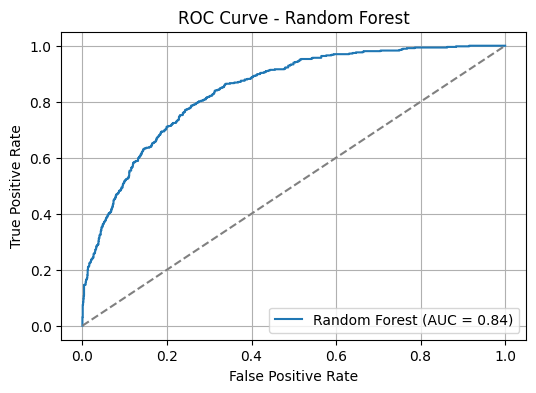

------------------------- SVC Key Metrics -------------------------
Accuracy : 74.8292%
Precision : 51.5537%
Recall : 78.6638%
F1 Score : 62.2867%
AUC-ROC : 0.8333


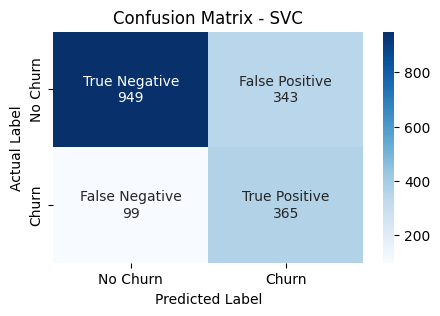

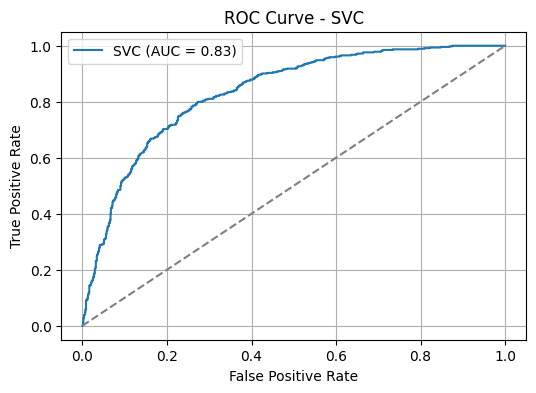

------------------------- XGBoost Key Metrics -------------------------
Accuracy : 79.8405%
Precision : 64.3229%
Recall : 53.2328%
F1 Score : 58.2547%
AUC-ROC : 0.8353


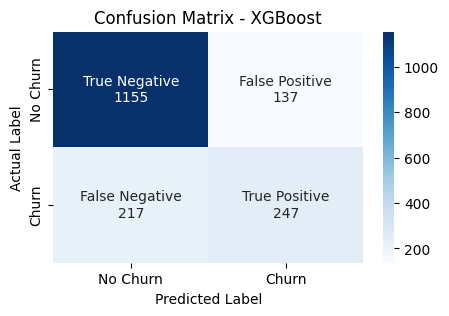

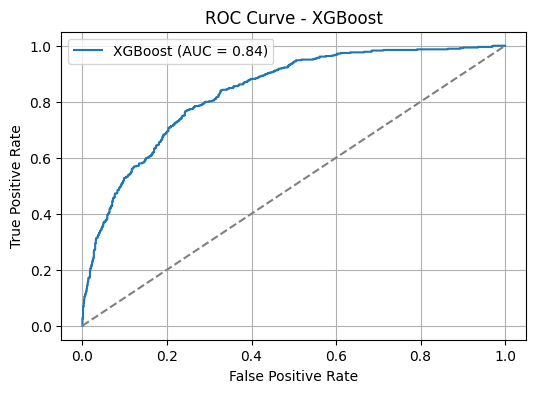

------------------------- LightGBM Key Metrics -------------------------
Accuracy : 76.0820%
Precision : 53.3951%
Recall : 74.5690%
F1 Score : 62.2302%
AUC-ROC : 0.8343


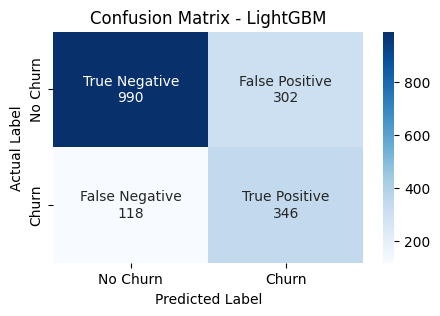

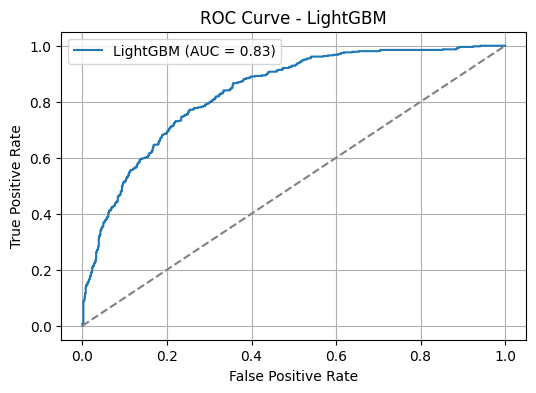

In [47]:
for model_name, (y_pred_class, y_pred_proba) in model_predictions.items():
    # Confusion Matrix and Metrics
    cm = confusion_matrix(y_test, y_pred_class)
    TN, FP, FN, TP = cm.ravel()
    labels = np.array([
        [f"True Negative\n{TN}", f"False Positive\n{FP}"],
        [f"False Negative\n{FN}", f"True Positive\n{TP}"]
    ])

    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    auc = roc_auc_score(y_test, y_pred_proba)

    print("-"*25, f"{model_name} Key Metrics", "-"*25)
    print(f"Accuracy : {accuracy * 100:.4f}%")
    print(f"Precision : {precision * 100:.4f}%")
    print(f"Recall : {recall * 100:.4f}%")
    print(f"F1 Score : {f1 * 100:.4f}%")
    print(f"AUC-ROC : {auc:.4f}")

    # Confusion Matrix Plot
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=labels, fmt="", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # AUC-ROC Plot
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.grid(True)
    plt.show()


**Observations:**
<!-- ### 📊 Confusion Matrix Comparison Table

| Model               | True Positive (TP) | True Negative (TN) | False Positive (FP) | False Negative (FN) | Accuracy (%) | Business Impact                                      |
|--------------------|--------------------|---------------------|----------------------|----------------------|--------------|------------------------------------------------------|
| Logistic Regression| 241                | 1175                | 117                  | 223                  | 79.2%        | High FN → Many churners missed (lost customers)      |
| Random Forest       | 327                | 1035                | 257                  | 137                  | 82.4%        | Lower FN than LR → Better at catching churners       |
| SVC (Support Vector)| 365                | 949                 | 343                  | 99                   | 82.4%        | Lowest FN → Best at identifying churners             |

---

### ✅ Key Takeaways:
- **SVC has the lowest FN (99)** → Best at catching churners, though it has the highest FP.
- **Random Forest offers a good balance** between FP and FN.
- **Logistic Regression misses the most churners** (high FN), which could hurt retention efforts.

> 📌 **In customer churn prediction, reducing False Negatives is usually the top priority**, as each FN represents a customer we fail to retain. -->


| Model                    | TP  | TN   | FP  | FN  | Accuracy (%) | Precision (%) | Recall (%) | F1 Score (%) | Business Impact                                         |
| ------------------------ | --- | ---- | --- | --- | ------------ | ------------- | ---------- | ------------ | ------------------------------------------------------- |
| **Logistic Regression**  | 241 | 1175 | 117 | 223 | 80.64        | 67.32         | 51.94      | 58.64        | High FN → Many churners missed (lost customers)         |
| **Random Forest**        | 327 | 1035 | 257 | 137 | 77.56        | 55.99         | 70.47      | 62.40        | Lower FN than LR → Better at catching churners          |
| **SVC (Support Vector)** | 365 | 949  | 343 | 99  | 74.83        | 51.55         | **78.66**  | 62.29        | Lowest FN → Best at identifying churners                |
| **XGBoost**              | 247 | 1155 | 137 | 217 | 79.84        | 64.32         | 53.23      | 58.25        | High TN/low FP, but relatively high FN                  |
| **LightGBM**             | 346 | 990  | 302 | 118 | 76.08        | 53.40         | 74.57      | 62.23        | Strong recall, better at catching churners than XGBoost |


✅ Key Takeaways:

- LightGBM has the second lowest FN (118) after SVC, making it strong for churn prediction.

- XGBoost has a high TN and low FP, but misses more churners than LightGBM or Random Forest.

- SVC remains the best at minimizing FN, but comes with the cost of many false alarms (high FP).

- LightGBM strikes a good trade-off: catching churners while keeping a reasonable FP rate.

**Note:**
- **Accuracy:** (TP + TN) / (TP + FP + TN + FN) - Overall correctness. Can be misleading for imbalanced dataset.
- **Precision:** TP / (TP + FP) - Of all customers predicted to churn. Howmany actually churned? (Measures exactness of positive predictions)
- **Recall(Sensitivity):** TP / (TP + FN) - Of all the customers who acutally churned, howmany did the model correctly identify?(Measures completeness of positive predictions - ability to find all churners)
- **F1-Score:** 2 * (Precision * Accuracy) / (Precision + Accuracy) - Harmonic mean of Precision and Recall. Good for imbalanced classes.

# 5. Final report with visualizations

## Telco Customer Churn: A Simple Guide to Our Findings
**Goal:** Understand why customers leave and build a tool to predict who might leave next.

**Part 1: What We Learned from the Data**\
We started by exploring the customer data. We found that about 1 in 4 customers (26.4%) eventually leave, which is a significant number.

So, who is most likely to leave? Our analysis pointed to three main groups:

Customers on Month-to-Month Contracts: These customers aren't locked in, so they churn at a much higher rate. Customers on 1 or 2-year contracts are far more loyal.

Newer Customers: Customers who have been with the company for only a few months (low tenure) are more likely to leave. Loyalty builds over time.

Customers with Specific Services:

Those with Fiber optic internet tend to leave more often.

Crucially, customers who don't have add-ons like Online Security and Tech Support are at a much higher risk of churning.

**Part 2: Building a Churn Predictor**\
After understanding the data, we prepared it for our predictive models. This involved cleaning the data and converting everything to a numerical format.

We then trained five different machine learning models to see which one was best at predicting churn.

**Which Model Performed Best?**

To pick the best model, we looked at a few key scores:

Recall: How good is the model at finding the customers who actually churned? (Higher is better for this problem).

F1-Score: A balanced score between being precise and finding all churners. (Higher is better).

AUC-ROC: A score that tells us how well the model can distinguish between a churner and a non-churner. (Higher is better).

Here's how they stacked up:

**The Winner: The LightGBM model.**

While other models like XGBoost were slightly better at telling the difference between churners and non-churners (highest AUC), LightGBM was the best at our main goal: finding the most customers who were actually going to leave (highest Recall and F1-Score). It's better to accidentally contact a happy customer with a retention offer than to miss one who is about to leave.

**Part 3: Our Recommendations (Action Plan)**\
Based on our findings, here's a simple, data-driven plan to reduce churn:

Use Our Model: Deploy the LightGBM model to get a daily "churn risk score" for every customer. Focus retention efforts on those with the highest scores.

Target Month-to-Month Customers: Create special offers to encourage these high-risk customers to switch to a 1 or 2-year plan. A small discount for a long-term commitment can save a customer.

Support New Customers: Implement a "new customer check-in" program. Reach out to customers in their first three months to ensure they are happy and understand their services.

Promote Key Services: Actively market Online Security and Tech Support. These services make customers' lives easier and make them less likely to leave. Offer a free trial to new Fiber optic customers.

By taking these steps, we can proactively address the key reasons for churn, improve customer loyalty, and protect our revenue.
